In [ ]:
# file used for initial EDA into NLP, various models, parameters, etc.

In [71]:
import pandas as pd
import numpy as np

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.manifold import MDS, TSNE
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances

from gensim import corpora, models, similarities, matutils
# logging for gensim (set to INFO)
import logging
logging.basicConfig(filename='gensim.log', format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

from textblob import TextBlob

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
additional_stop_words = ['like', 'said', 'would', 'could', 'should', 'one']
my_stop_words = stop_words.union(additional_stop_words)
print(my_stop_words)

{'for', 'after', 'wouldn', 'which', 'were', 'and', "you've", 'd', 'myself', 'will', 'until', 'whom', 'would', 'who', 'his', 'itself', 'like', 'ours', 'ourselves', 'over', 'll', "she's", 'having', "isn't", 'own', "mustn't", 'they', 'now', 'into', "you'll", "don't", "shouldn't", 'himself', 'their', 'an', 'is', "that'll", 'during', "wouldn't", 'yourselves', 'mustn', 'there', 'theirs', 'we', 'why', 'not', 'when', 'from', 'i', 've', 'hers', 'both', "you'd", 'just', 'yourself', 'in', 'how', 'any', 'too', 'weren', 'very', 'out', 'she', 'the', 'all', 'hadn', 'hasn', 'doing', 'can', 'one', 'with', 'above', "should've", 'up', 'off', 'be', 'wasn', 'them', 'didn', 'against', 'some', "needn't", 'ain', 'under', 'through', 'y', 'said', 'once', 'does', 'isn', 'down', "couldn't", "shan't", 'been', 'before', 'are', 'what', 'such', 'so', 'our', 'shouldn', 'where', 'should', 'this', 'more', 'you', 'at', 'being', "hasn't", 'doesn', 'nor', 'here', 'mightn', 'needn', "wasn't", 'or', 'm', 'did', 'do', 's', 'h

In [3]:
# get counts and remove stop words
def vectorizeText(inputText, min_df=1, max_df=1.0):
    cv = CountVectorizer(stop_words=my_stop_words, min_df=min_df, max_df=max_df)
    X = cv.fit_transform(inputText)
    
    return X, cv

# get term frequencies and remove stop words
def vectorizeTextIDF(inputText, min_df=1, max_df=1.0):
    cv_tfidf = TfidfVectorizer(stop_words=my_stop_words, min_df=min_df, max_df=max_df)
    X_tfidf = cv_tfidf.fit_transform(inputText)
    
    return X_tfidf, cv_tfidf   

In [4]:
unpickled_df = pd.read_pickle("./sla_chapter_text.pkl")
unpickled_df

,chapter_text,book,chapter
0,prelud stormlight archiv kalak round rocki st...,1,1
1,love men frigid thing mountain stream three s...,1,2
2,kill bastard kill sun still hot die day week ...,1,3
3,ten order love forsaken us almighti shard sou...,1,4
4,man stood watch homeland fall dust water surg...,1,5
...,...,...,...
456,discard help potenti ﬁnal passion el ﬁrst fin...,4,127
457,ye look forward rule human el ﬁrst final ten ...,4,128
458,nearli much look forward serv newest odium re...,4,129
459,fourteen month ago eshonai hit ground chasm f...,4,130


In [5]:
unpickled_df.iloc[200:220]

,chapter_text,book,chapter
200,moment notwithstand honestli say book brew si...,3,9
201,sum experi point moment decis oathbring prefa...,3,10
202,perhap heresi stretch back day childhood idea...,3,11
203,thirti three year ago dalinar danc one foot m...,3,12
204,ask forgiv even understand oathbring prefac d...,3,13
205,ask read listen word oathbring prefac shallan...,3,14
206,record hold noth back tri shi away diﬃcult to...,3,15
207,express direct even brutal truth must know do...,3,16
208,come lesson oathbring prefac legend rest ston...,3,17
209,lesson claim abl teach experi great teacher m...,3,18


In [6]:
# look at vectorized text with various max_df and min_df options

points_x_min = []
points_y_min = []

for val in np.linspace(0, .2, 21):
    vectorized_matrix, vectorizer = vectorizeText(unpickled_df['chapter_text'], val, 1.0)
    
    print("low threshold: ", val, " features: ", vectorized_matrix.shape[1])
    vectorized_matrix.shape
    
    points_x_min.append(val)
    points_y_min.append(vectorized_matrix.shape[1])
    
#     if val < 0.01:
#     print(len(vectorizer.stop_words_))

low threshold:  0.0  features:  13384
low threshold:  0.01  features:  6484
low threshold:  0.02  features:  4670
low threshold:  0.03  features:  3961
low threshold:  0.04  features:  3381
low threshold:  0.05  features:  2972
low threshold:  0.06  features:  2725
low threshold:  0.07  features:  2473
low threshold:  0.08  features:  2312
low threshold:  0.09  features:  2121
low threshold:  0.1  features:  1963
low threshold:  0.11  features:  1846
low threshold:  0.12  features:  1715
low threshold:  0.13  features:  1619
low threshold:  0.14  features:  1525
low threshold:  0.15  features:  1436
low threshold:  0.16  features:  1373
low threshold:  0.17  features:  1301
low threshold:  0.18  features:  1239
low threshold:  0.19  features:  1179
low threshold:  0.2  features:  1095


In [7]:
points_x_max = []
points_y_max = []

for val in np.linspace(0.05, 1.0, 20):
#     vectorized_matrix, vectorizer = vectorizeText(unpickled_df['chapter_text'], 0.01, val)
    vectorized_matrix, vectorizer = vectorizeText(unpickled_df['chapter_text'], 1, val)
    
    print("high threshold: ", val, " features: ", vectorized_matrix.shape[1])
    vectorized_matrix.shape
    
    points_x_max.append(val)
    points_y_max.append(vectorized_matrix.shape[1])
    
    print(len(vectorizer.stop_words_))
    if val > .74:
        print(vectorizer.stop_words_)

high threshold:  0.05  features:  10412
2972
high threshold:  0.1  features:  11421
1963
high threshold:  0.15  features:  11948
1436
high threshold:  0.2  features:  12289
1095
high threshold:  0.25  features:  12493
891
high threshold:  0.3  features:  12661
723
high threshold:  0.35  features:  12790
594
high threshold:  0.39999999999999997  features:  12887
497
high threshold:  0.44999999999999996  features:  12963
421
high threshold:  0.49999999999999994  features:  13030
354
high threshold:  0.5499999999999999  features:  13094
290
high threshold:  0.6  features:  13152
232
high threshold:  0.65  features:  13196
188
high threshold:  0.7  features:  13236
148
high threshold:  0.75  features:  13277
107
{'us', 'left', 'ask', 'give', 'continu', 'want', 'leav', 'peopl', 'help', 'place', 'light', 'man', 'two', 'need', 'stand', 'far', 'away', 'might', 'arm', 'someon', 'come', 'wait', 'think', 'alway', 'let', 'stood', 'start', 'get', 'voic', 'open', 'face', 'done', 'besid', 'men', 'thi

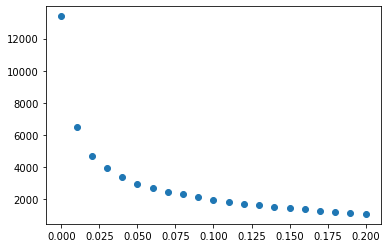

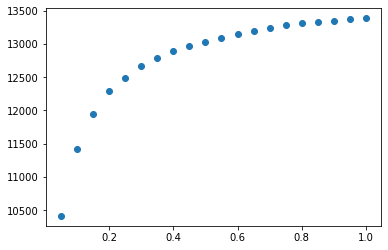

In [8]:
plt.figure()
plt.scatter(points_x_min, points_y_min)
plt.figure()
plt.scatter(points_x_max, points_y_max)

In [9]:
# stop here

In [10]:
# vectorized_matrix, vectorizer = vectorizeText(unpickled_df['chapter_text'])
vectorized_matrix, vectorizer = vectorizeTextIDF(unpickled_df['chapter_text'], 0.01, 0.75)

In [11]:
# non-negative matrix factorization
nmf_model = NMF(6, random_state=84597)
doc_topic_matrix = nmf_model.fit_transform(vectorized_matrix)
print(doc_topic_matrix.shape)

topic_word_matrix = nmf_model.components_
print(topic_word_matrix.shape)

words = vectorizer.get_feature_names()
t = nmf_model.components_.argsort(axis=1)[:,-1:-7:-1]
topic_words = [[words[e] for e in l] for l in t]
topic_words

(461, 6)
(6, 6377)


[['shallan', 'jasnah', 'veil', 'pattern', 'tyn', 'balat'],
 ['kaladin', 'teft', 'syl', 'bridg', 'moash', 'rock'],
 ['dalinar', 'sadea', 'navani', 'vision', 'gavilar', 'parshendi'],
 ['venli', 'eshonai', 'rhythm', 'human', 'attun', 'rlain'],
 ['adolin', 'veil', 'honorspren', 'sadea', 'duel', 'spren'],
 ['navani', 'raboniel', 'szeth', 'taravangian', 'sibl', 'tower']]

In [12]:
print(doc_topic_matrix[205])

[0.20295764 0.         0.         0.         0.18282419 0.        ]


In [13]:
max_k = 10
for k in range(1, max_k):
    print("Trying NMF with: ", k, " topics")
    nmf_model = NMF(k, random_state=84597)
    doc_topic_matrix = nmf_model.fit_transform(vectorized_matrix)
    topic_word_matrix = nmf_model.components_
    t = nmf_model.components_.argsort(axis=1)[:,-1:-7:-1]
    topic_words = [[words[e] for e in l] for l in t]
#     print(topic_words)
    
    for i in range(k):
        print("Topic %d:" % i, end='')
        for word in topic_words[i]:
            print(' %s' % word, end='')
        print()
        
    print()

Trying NMF with:  1  topics
Topic 0: kaladin dalinar shallan adolin navani jasnah

Trying NMF with:  2  topics
Topic 0: dalinar shallan adolin jasnah navani veil
Topic 1: kaladin teft syl bridg moash rock

Trying NMF with:  3  topics
Topic 0: shallan jasnah adolin veil pattern father
Topic 1: kaladin teft syl bridg moash rock
Topic 2: dalinar navani adolin sadea taravangian venli

Trying NMF with:  4  topics
Topic 0: shallan jasnah adolin veil pattern father
Topic 1: kaladin teft syl bridg moash rock
Topic 2: dalinar adolin navani sadea taravangian king
Topic 3: venli eshonai raboniel rhythm human navani

Trying NMF with:  5  topics
Topic 0: shallan jasnah veil pattern tyn balat
Topic 1: kaladin teft syl bridg moash rock
Topic 2: dalinar navani taravangian sadea vision gavilar
Topic 3: venli eshonai raboniel rhythm human rlain
Topic 4: adolin veil honorspren sadea duel spren

Trying NMF with:  6  topics
Topic 0: shallan jasnah veil pattern tyn balat
Topic 1: kaladin teft syl bridg moas

In [131]:
# kmeans clustering
k_clusters = 4

km = KMeans(n_clusters=k_clusters, init='k-means++', max_iter=100, n_init=10, random_state=425)
doc_clusters = km.fit_predict(vectorized_matrix)

order_centroids = km.cluster_centers_.argsort()[:,::-1]
cluster_top_words = []

for i in range(k_clusters):
    print("Cluster %d:" % i, end='')
    for j, ind in enumerate(order_centroids[i, :6]):
        print(' %s' % words[ind], end='')
        if j == 0:
            cluster_top_words.append(words[ind])
    print()

Cluster 0: kaladin syl teft bridg adolin moash
Cluster 1: dalinar adolin navani sadea parshendi taravangian
Cluster 2: venli eshonai raboniel szeth navani rhythm
Cluster 3: shallan adolin jasnah veil pattern father


In [132]:
doc_clusters[205]

cluster_top_words

['kaladin', 'dalinar', 'venli', 'shallan']

In [16]:
inertias = []
max_k = 10
for k in range(1, max_k):
    print("Trying kMeans clustering with: ", k, " clusters")
    km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=10, random_state=425)
    clusters = km.fit(vectorized_matrix)
    inertias.append(clusters.inertia_)    
    
    order_centroids = km.cluster_centers_.argsort()[:,::-1]

    for i in range(k):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :6]:
            print(' %s' % words[ind], end='')
        print()
        
    print()

Trying kMeans clustering with:  1  clusters
Cluster 0: kaladin dalinar shallan adolin navani venli

Trying kMeans clustering with:  2  clusters
Cluster 0: dalinar shallan adolin venli navani jasnah
Cluster 1: kaladin syl teft bridg dalinar moash

Trying kMeans clustering with:  3  clusters
Cluster 0: kaladin teft syl bridg moash adolin
Cluster 1: dalinar navani adolin sadea parshendi taravangian
Cluster 2: shallan venli adolin jasnah veil eshonai

Trying kMeans clustering with:  4  clusters
Cluster 0: kaladin syl teft bridg adolin moash
Cluster 1: dalinar adolin navani sadea parshendi taravangian
Cluster 2: venli eshonai raboniel szeth navani rhythm
Cluster 3: shallan adolin jasnah veil pattern father

Trying kMeans clustering with:  5  clusters
Cluster 0: dalinar adolin navani sadea parshendi vision
Cluster 1: kaladin syl teft bridg moash dalinar
Cluster 2: venli eshonai rhythm human raboniel attun
Cluster 3: navani szeth taravangian raboniel kal lirin
Cluster 4: shallan adolin jasnah

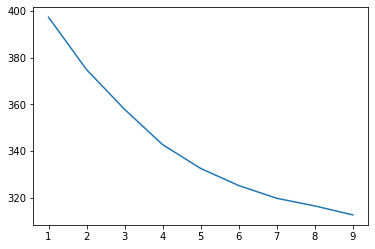

In [17]:
ks = [k for k in range(1,max_k)]
plt.plot(ks, inertias)

In [18]:
# get distances of points 
# distances  = 1 - cosine_similarity(vectorized_matrix) # same as just the cosine distance: D = 1 - S
distances  = cosine_distances(vectorized_matrix)

In [19]:
distances.shape

(461, 461)

In [20]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=232, max_iter=300, verbose=1)
positions_2d = mds.fit_transform(distances)
print('Final stress value: %f' %mds.stress_)


xs, ys = positions_2d[:, 0], positions_2d[:, 1]

breaking at iteration 206 with stress 10802.272497824946
Final stress value: 10230.095448


In [21]:
positions_2d.shape

(461, 2)

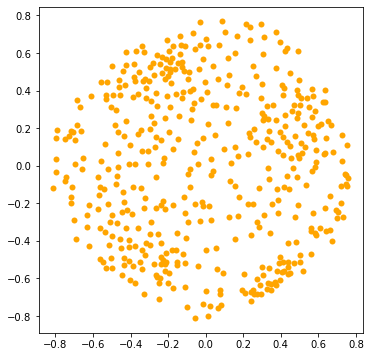

In [22]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(xs, ys, marker='o', markersize=6, linestyle='', color='orange', alpha=1.0, mec="none" ) 
ax.set_aspect('equal')


# ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
# ax.tick_params(axis='y',which='both',left='off',right='off',labelleft='off')
# ax.set_xlim(-0.85,1.7)
# ax.set_ylim(-0.85,0.85)

plt.show()

In [125]:
# try TSNE plot

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200, random_state=6321)
# %timeit -n 1 -r 1 
# tsne_results = tsne.fit_transform(distances)
tsne_results = tsne.fit_transform(vectorized_matrix)


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 461 samples in 0.007s...
[t-SNE] Computed neighbors for 461 samples in 0.465s...
[t-SNE] Computed conditional probabilities for sample 461 / 461
[t-SNE] Mean sigma: 0.377606
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.994423
[t-SNE] KL divergence after 1000 iterations: 0.626809


In [126]:
print(vectorized_matrix.shape)
print(distances.shape)
print(tsne_results.shape)

(461, 6377)
(461, 461)
(461, 2)


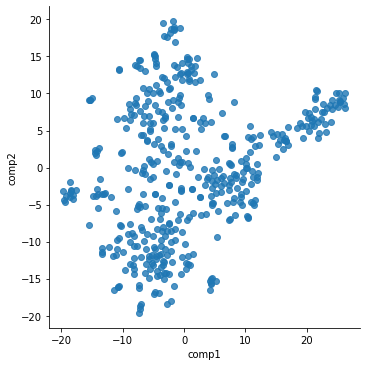

In [127]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
# df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne, fit_reg=False)
# sns.scatterplot(x='comp1', y='comp2', data=df_tsne)

In [23]:
# try gensim LDA

vectorized_matrix_noidf, vectorizer_noidf = vectorizeText(unpickled_df['chapter_text'], 0.01, 0.75)


In [24]:
doc_words = vectorized_matrix_noidf.transpose()
corpus_for_lda = matutils.Sparse2Corpus(doc_words)
id2word = dict((v, k) for k, v in vectorizer_noidf.vocabulary_.items())

lda = models.LdaModel(corpus=corpus_for_lda, num_topics=5, id2word=id2word, passes=5, random_state=67676, eval_every=1)

In [25]:
lda.print_topics()

[(0,
  '0.010*"venli" + 0.007*"adolin" + 0.006*"navani" + 0.006*"veil" + 0.006*"human" + 0.006*"spren" + 0.006*"shallan" + 0.005*"radiant" + 0.004*"eshonai" + 0.004*"raboniel"'),
 (1,
  '0.035*"dalinar" + 0.013*"adolin" + 0.008*"kaladin" + 0.006*"sadea" + 0.006*"navani" + 0.005*"king" + 0.004*"soldier" + 0.004*"parshendi" + 0.003*"bridg" + 0.003*"father"'),
 (2,
  '0.022*"kaladin" + 0.007*"bridg" + 0.006*"navani" + 0.005*"teft" + 0.005*"room" + 0.004*"tower" + 0.004*"moash" + 0.004*"syl" + 0.004*"spren" + 0.004*"rlain"'),
 (3,
  '0.044*"kaladin" + 0.007*"syl" + 0.006*"rock" + 0.005*"kal" + 0.004*"wall" + 0.004*"teft" + 0.004*"spear" + 0.004*"stormlight" + 0.004*"soldier" + 0.004*"szeth"'),
 (4,
  '0.031*"shallan" + 0.011*"kaladin" + 0.010*"jasnah" + 0.005*"adolin" + 0.005*"father" + 0.004*"pattern" + 0.004*"woman" + 0.003*"rock" + 0.003*"room" + 0.003*"sphere"')]

In [26]:
stringtest = lda.print_topic(0,6)
stringtest

'0.010*"venli" + 0.007*"adolin" + 0.006*"navani" + 0.006*"veil" + 0.006*"human" + 0.006*"spren"'

In [27]:
lda_corpus = lda[corpus_for_lda]
lda_docs = [doc for doc in lda_corpus]
lda_docs[203]

[(1, 0.9989873)]

In [28]:
type(lda_docs)

list

In [29]:
lda.get_topic_terms(0, topn=10)


[(5962, 0.009536454),
 (67, 0.0071701594),
 (3448, 0.006430068),
 (5957, 0.0062236455),
 (2546, 0.0058783162),
 (5081, 0.0058022263),
 (4698, 0.0056842747),
 (4145, 0.004673043),
 (1766, 0.0044919183),
 (4140, 0.00448509)]

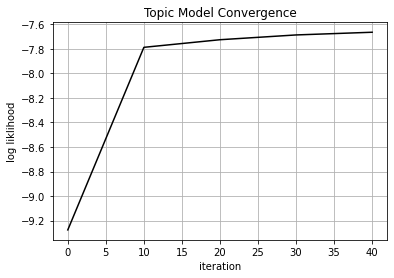

In [30]:
# if this file is rerun, the log file gets appended to and then the plot below will repeat
import re
p = re.compile("(-*\d+\.\d+) per-word .* (\d+\.\d+) perplexity")
matches = [p.findall(l) for l in open('gensim.log')]
matches = [m for m in matches if len(m) > 0]
tuples = [t[0] for t in matches]
perplexity = [float(t[1]) for t in tuples]
liklihood = [float(t[0]) for t in tuples]
iter = list(range(0,len(tuples)*10,10))
plt.plot(iter,liklihood,c="black")
plt.ylabel("log liklihood")
plt.xlabel("iteration")
plt.title("Topic Model Convergence")
plt.grid()
plt.show()
# plt.savefig("convergence_liklihood.pdf")
# plt.close()

In [57]:
# test textblob sentiment analysis
text_test = TextBlob(unpickled_df['chapter_text'][121]) # 121
text_test.sentiment

Sentiment(polarity=0.15466813472021812, subjectivity=0.4676813522126022)

In [50]:
unpickled_df.iloc[121]

chapter_text     ti said warm land far away voidbring enter so...
book                                                            2
chapter                                                        35
Name: 121, dtype: object

In [48]:
unpickled_df['chapter_text'][121]

' ti said warm land far away voidbring enter song brought home stay home becam happen gradual year ahead twil still said ti listen song histori stanza shallan gasp sudden ﬂare color disrupt landscap like break lightn otherwis clear sky shallan set practic palm stood wagon steadi freehand back seat ye unmistak brilliant red yellow otherwis dull canva brown green tyn shallan said woman loung feet wide brim white hat tip eye despit fact suppos drive shallan wore bluth hat recov thing keep sun oﬀ tyn turn side lift hat huh right shallan said color tyn squint see anyth could miss color vibrant compar roll hill full rockbud reed patch grass shallan took woman spyglass rais look close plant shallan said rock overhang shelter east oh tyn settl back close eye thought might caravan tent someth tyn plant diverg ﬂora otherwis uniform ecosystem shallan exclaim go go tell macob steer caravan way kid kind strang tyn said shallan yell wagon stop macob reluct agre detour fortun accept author caravan da

In [145]:
colors = sns.color_palette()
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [144]:
for i,_ in enumerate(colors):
    print(colors.as_hex()[i])

#1f77b4
#ff7f0e
#2ca02c
#d62728
#9467bd
#8c564b
#e377c2
#7f7f7f
#bcbd22
#17becf
